<a href="https://colab.research.google.com/github/DanielDanger/mlBachelor/blob/daniel/ML_Bachelor_Projektarbeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Bachelor Projekt**

**Teamname: 285603**
- Daniel Degenhardt - Matnr. 72387
- Christoph Göbler - Matnr. 138478
- Oktay Kutschera - Matnr. 74738


## Erläuterung der Vorgehensweise:
Zur Entwicklung der verschiedenen Machine Learning Modelle haben wir uns an dem im Bereich der Data Science oft verwendeten CRISP-DM Modell orientiert. Aufgrund der Relevanz für diese Arbeit, haben wir uns hierbei vor allem auf die Schritte der Data Preparation, des Modellings und der Evaluation konzentriert. 

### Erster Schritt: Laden der Datensätze in das Dokument & Importieren aller zunächst relevanten Libraries für die Arbeit in Google Colab

In [1]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 


# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
link = 'https://drive.google.com/file/d/1u1gYmv2sDvoo_Lh6J1QyDlb_ldtiH2G5/view?usp=sharing'

# Break up the string with / being the seperator and returns a list of strings. [-2] gets the second to last part of the list which is the ID.
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('train.csv')   
  
df_train = pd.read_csv('train.csv') 

link = 'https://drive.google.com/file/d/1e-di8EI_pVCowDaZxb_SQlovzfKkB9_Z/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('test.csv')   
  
df_test = pd.read_csv('test.csv') 


# **Hier Daten laden** 

In [3]:
#df_train = 
#df_test = 

# **Business Understanding**

Wurde sich durch das zugehörige PDF-Dokument, in dem die Aufgabenstellung dargelegt wird, angeeignet.



# **Data Understanding**

Wurde sich vorwiegend ebenfalls durch das zugehörige PDF-Dokument angeeignet, indem die Features sowie deren Ausprägungen kompakt und verständlich dargelegt wurden.

Darstellung des Training-Datensatzes

In [4]:
df_train

,transactionId,basket,customerType,totalAmount,returnLabel
0,7934161612,[3],existing,77.0,0
1,5308629088,"[5, 3, 0, 3]",existing,64.0,0
2,1951363325,"[3, 3, 1, 4]",new,308.0,1
3,6713597713,[2],existing,74.0,0
4,8352683669,"[4, 4, 4, 4]",new,324.0,1
...,...,...,...,...,...
24995,8178087221,"[4, 3, 2, 4, 2, 2, 4, 1, 0]",new,756.0,1
24996,8955146476,"[5, 5, 5, 0, 0, 2, 4, 1, 2, 4, 5, 2]",existing,600.0,0
24997,7770630838,"[1, 3, 4, 4, 2, 0]",existing,252.0,0
24998,3758775159,"[5, 3]",existing,66.0,0


Untersuchung des Datensatzes nach den Datentypen. Eine solche Untersuchung ist vor allem für die Data Preparation relevant, indem hiermit notwendige Datentransformationen herausgefiltert werden können.

In [5]:
df_train.dtypes

transactionId      int64
basket            object
customerType      object
totalAmount      float64
returnLabel        int64
dtype: object

Untersuchung des Datensatzes nach fehlenden Werten

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  25000 non-null  int64  
 1   basket         25000 non-null  object 
 2   customerType   24483 non-null  object 
 3   totalAmount    24516 non-null  float64
 4   returnLabel    25000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 976.7+ KB


**Hinweis: die nachfolgenden beiden Funktionen wurden aufgrund der Notwendigkeit zur Erstellung des Schaubildes vorgezogen und sind daher nicht, wie sonst üblich, im "Data Preparation" Part verankert. **

Funktion, welche das Datenfeld des `basket` Features in eine Liste transformiert und dem Dataframe anhängt.

In [7]:
import json
def transform_basket_tolist(dfp):
  print(dfp)
  basket_list = dfp["basket"].values.tolist()
  new_basket_list = []
  for x in basket_list:
    basket = json.loads(x) #Transformation der basket_list Strings in Liste. Convert a json object/array to a python dict/list.
    new_basket_list.append(basket)
  dfp["basket_new"] = new_basket_list
  return dfp

Hilfsfunktion, die für die Erstellung des nachfolgenden Charts benötigt wird.
Konkret wird mithilfe dieser Funktion die Gesamtsumme der verkauften Bücher pro Kategorie berechnet.

In [8]:
def count_occurences(df):
  df1 = df['basket_new'].explode() # Explode Function löst die Werte im Basket auf -> erstellt für jeden Wert eine neue Zeile, wobei der Zeilenindex der Ursprungstabelle als Referenz verwendet wird
  df = df.join(pd.crosstab(df1.index, df1).add_prefix('Cat_')) # Crosstab: Aggregiert die Werte des df1 Dataframes anhand der Indizes -> Wie oft kommt dieser Wert im Index vor? -> Spalte für jeden Wert
  return df


Eine erste Analyse des Datensatzes, mit der die Anzahl der Rücksendungen pro Kategorie betrachtet werden sollen.

       transactionId  ... returnLabel
0         7934161612  ...           0
1         5308629088  ...           0
2         1951363325  ...           1
3         6713597713  ...           0
4         8352683669  ...           1
...              ...  ...         ...
24995     8178087221  ...           1
24996     8955146476  ...           0
24997     7770630838  ...           0
24998     3758775159  ...           0
24999     7697226342  ...           1

[25000 rows x 5 columns]
Cat_0     3065
Cat_1     3185
Cat_2     3056
Cat_3     9498
Cat_4    15835
Cat_5        0
dtype: int64


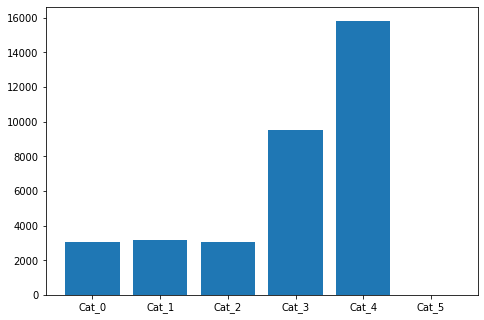

In [9]:
df_train_new = count_occurences(df=transform_basket_tolist(df_train))

import matplotlib.pyplot as plt
import numpy as np


# Hole alle Rücksendungen aus dem Dataframe
df_train_return = df_train_new[df_train['returnLabel']==1] 

cat_array = df_train_return.drop(columns=["totalAmount","returnLabel","transactionId","basket","basket_new","customerType"]) # Wirf alles bis auf die Kategorien raus 

# Wie viele Objekte sind im Dataframe vorhanden? Axis = 0 refers to the columns (you go down the column).
df_calc = cat_array.sum(axis = 0, skipna = True) 
# Transformiere alle relevanten Spalten in ein NumpyArray, damit wir es im Barchart darstellen können 
#cat_array = df_calc.drop(columns=["totalAmount","returnLabel"]).to_numpy()

print(df_calc)

fig = plt.figure()
# [left, bottom, width, height]
ax = fig.add_axes([0,0,1,1])
cats = ['Cat_0', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5'] #Label für die X Achse 


ax.bar(cats,list(df_calc))
plt.show()

# **Data Preparation**

Generell wurden die verschiedenen relevanten Transformationen ganz nach dem Prinzip der Modularisierung in verschiedene Funktionen untergliedert. Mithilfe dieser Modularisierung können Datensätze möglichst flexibel und individuell transformiert werden.

Funktion, welche die Anzahl der bestellten Bücher ermittelt.

In [10]:
import ast
def calculate_basket_size(dfi):
  # ast.literal_eval safely evaluates strings containing Python expressions without the need to parse the values oneself. 
  dfi["basket_size"] = dfi.basket.apply(lambda x: len(ast.literal_eval(x))) # ast.literal_eval formatiert den String in das entsprechende Listen-Format 
  return dfi


Funktion, welche die fehlenden Werte im Dataframe auffüllt.

In [11]:
import statistics
def fill_na(df):
  df['totalAmount'].fillna((df['totalAmount'].mean()), inplace=True)
  df["customerType"].fillna(statistics.mode(df["customerType"]), inplace= True)
  return df
# inplace=True -> direkt im Dataframe durchführen

Funktion zur Überprüfung, ob eine Buch-Kategorie im `basket` vorhanden ist. Konkreter: One Hot Encoding der Bücher-Kategorien.

In [12]:
def cat_in_basket(dfi):
  i=0
  while i<=5:
    cat="Cat_"+str(i)
    # .map() Returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.) 
    dfi[cat]=dfi[cat].map(lambda x: 1 if x > 0 else 0) # Gehe durch jede einzelne Kategorie, wenn Wert der Kategorie größer 1 ist -> setze Zelleninhalt auf 1
    i=i+1
  return dfi

One Hot Encoding des `customerType`.

In [13]:
from pandas.api.types import is_string_dtype
def map_customer(df): 
  if (is_string_dtype(df.customerType)):
    df.customerType=df.customerType.map({'existing':1,'new':0})

Funktion, die das Vorkommen einer Buchkategorie im Warenkorb in Form der absoluten Häufigkeit zählt.

In [14]:
def count_categories(dfi1): 
  df1 = dfi1['basket_new'].explode()
  dfi1=dfi1[['customerType','totalAmount','returnLabel','basket_size']].join(pd.crosstab(df1.index, df1).add_prefix('Cat_'))
  dfi1=dfi1[['customerType','Cat_0','Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','totalAmount','returnLabel','basket_size']]
  return dfi1

Funktion, mit der das Rücksendeverhältnis / die Rücksendewahrscheinlichkeit einer Buchkategorie bestimmt wird.

In [15]:
def cal_return_prob(dfi):
    # Kennzahlen für den Bereich der Rücksendungen ermitteln 
    books_returned = dfi[dfi.returnLabel==1]
    books_returned = books_returned.sum(axis = 0, skipna = True) #Summe aller Spalten -> dann nur die Kategorien rausfiltern 
    books_returned_array = books_returned[["Cat_0","Cat_1","Cat_2","Cat_3","Cat_4","Cat_5"]].to_numpy() #Convert the DataFrame to a NumPy array.
    #Ergebnis: Anzahl der Bücher, die pro Kategorie zurückgeschickt wurden
    all_books = dfi.sum(axis = 0, skipna = True)
    all_books_array = all_books[["Cat_0","Cat_1","Cat_2","Cat_3","Cat_4","Cat_5"]].to_numpy()

    #Berechne das Rücksendeverhältnis der einzelnen Kategorien 
    verhältnis = books_returned_array / all_books_array

    return verhältnis

Funktion, mit der die Rücksendewahrscheinlichkeit eines Warenkorbs berechnet wird.

In [16]:
def return_prob(dfi):
  
  verhältnis = cal_return_prob(dfi)
  df_return = dfi
  df_return["basket_size"] = df_return.Cat_0+ df_return.Cat_1+df_return.Cat_2+df_return.Cat_3+df_return.Cat_4+df_return.Cat_5
  df_return["return_prob"] = (df_return.Cat_0*verhältnis[0]+df_return.Cat_1*verhältnis[1]+df_return.Cat_2*verhältnis[2]+df_return.Cat_3*verhältnis[3]+df_return.Cat_4*verhältnis[4]+df_return.Cat_5*verhältnis[5])/(
  df_return.basket_size)
  return df_return

Funktion, mit der die am häufigsten im Warenkorb vorkommende Buchkategorie bestimmt wird.

In [17]:
from collections import Counter
def top_category(df):
  df["top_cat"] = df.basket_new.apply(lambda x: Counter(x).most_common(1)[0][0]) # Gibt ein sortiertes Array zurück, häufigster Wert steht an erster Stelle
  return df

Die für die Skalierung der Daten benötigten Funktionen.

In [18]:
from sklearn.preprocessing import StandardScaler
 
#Funktion, um Scaler mit den Parametern zu erstellen
def get_scaler(dfi):
  scaler = StandardScaler()
  df_for_scaling = dfi.drop(columns=['returnLabel'])
  scaler = scaler.fit(df_for_scaling)
  return scaler
 
#Funktion, um Daten zu skalieren
def scale_data(scaler,dfi):
  df_for_scaling = dfi.drop(columns=['returnLabel'])
  scaled_data = scaler.transform(df_for_scaling)
  return scaled_data

Die "eigentliche" finale Transformationsfunktion, die alle vorher aufgelisteten Funktionen zur Datenvorbereitung aufruft. Das Ergebnis dieses Ablaufs ist der finale für das Training bzw. das Testen zu verwendende Datensatz.

In [19]:

def prepare_train(dfi): 
    dfi.drop(columns='transactionId',inplace=True)
    y_train = dfi.returnLabel
    dfi = fill_na(dfi)
    map_customer(dfi)
    dfi = calculate_basket_size(dfi)
    dfi = transform_basket_tolist(dfi)
    dfi =  top_category(dfi)
    dfi = count_categories(dfi) 
    dfi = return_prob(dfi) 
    scaler = get_scaler(dfi)
    x_train = scale_data(scaler,dfi)
    
    return x_train,y_train, scaler  

def prepare_test(dfi,scaler): 
    dfi.dropna(axis=0, inplace=True)
    df_test_Y = dfi.returnLabel
    dfi = dfi.drop(columns=['transactionId'])
    map_customer(dfi)
    dfi = calculate_basket_size(dfi)
    dfi = transform_basket_tolist(dfi)
    dfi = top_category(dfi)
    dfi = count_categories(dfi)
    dfi = return_prob(dfi)
    df_test_X = scale_data(scaler,dfi)
    return df_test_X,df_test_Y

In [20]:
X_train,y_train,scaler = prepare_train(df_train)



                                     basket  ...  basket_size
0                                       [3]  ...            1
1                              [5, 3, 0, 3]  ...            4
2                              [3, 3, 1, 4]  ...            4
3                                       [2]  ...            1
4                              [4, 4, 4, 4]  ...            4
...                                     ...  ...          ...
24995           [4, 3, 2, 4, 2, 2, 4, 1, 0]  ...            9
24996  [5, 5, 5, 0, 0, 2, 4, 1, 2, 4, 5, 2]  ...           12
24997                    [1, 3, 4, 4, 2, 0]  ...            6
24998                                [5, 3]  ...            2
24999                       [4, 4, 0, 3, 4]  ...            5

[25000 rows x 6 columns]


In [21]:
X_test,y_test = prepare_test(df_test,scaler)

                        basket  customerType  ...  returnLabel  basket_size
0     [4, 0, 3, 4, 1, 4, 3, 4]             0  ...            1            8
1                          [4]             1  ...            0            1
2                    [1, 3, 5]             1  ...            0            3
3                          [3]             1  ...            1            1
4              [0, 0, 2, 5, 2]             1  ...            0            5
...                        ...           ...  ...          ...          ...
5995                 [3, 4, 4]             1  ...            1            3
5996        [4, 4, 3, 4, 1, 4]             0  ...            1            6
5997              [3, 4, 4, 4]             1  ...            0            4
5998                    [5, 1]             1  ...            0            2
5999  [1, 4, 5, 0, 3, 0, 3, 0]             1  ...            0            8

[5744 rows x 5 columns]


# Modeling

Hier erfolgt zunächst die Auswahl der besten Parameter, wobei mit eben diesen dann im Anschluss bereits das jeweilige ML-Modell trainiert wird.

Logistische Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameter_candidates = [{'C': [0.1,1,4,5,6,10,30,100], 'penalty': ['l1','l2']}]
clf_log = LogisticRegression(random_state=0)
grid_clf_log = GridSearchCV(estimator=clf_log, param_grid=parameter_candidates, n_jobs=-1)
grid_clf_log.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 4, 5, 6, 10, 30, 100],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
log_reg_best_est_C= grid_clf_log.best_estimator_.C
log_reg_best_est_pen=grid_clf_log.best_estimator_.penalty
print('Best C:', grid_clf_log.best_estimator_.C) 
print('Best penalty:', grid_clf_log.best_estimator_.penalty)

Best C: 30
Best penalty: l2


In [24]:
#Trainieren des optimalen Modells
clf_log = LogisticRegression(random_state=0, C=log_reg_best_est_C, penalty=log_reg_best_est_pen)
clf_log.fit(X_train, y_train)

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
parameter_candidates = [{'n_estimators': [60,80,100,120,40], 'max_depth': [2,3,4,5]}]
clf_rfc = RandomForestClassifier(random_state=0)
grid_clf_rfc = GridSearchCV(estimator=clf_rfc, param_grid=parameter_candidates, n_jobs=-1)
grid_clf_rfc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [26]:
ran_for_best_est_n=grid_clf_rfc.best_estimator_.n_estimators
ran_for_best_est_depth=grid_clf_rfc.best_estimator_.max_depth
print('Best n_estimators:', grid_clf_rfc.best_estimator_.n_estimators) 
print('Best max_depth:', grid_clf_rfc.best_estimator_.max_depth)

Best n_estimators: 80
Best max_depth: 5


In [27]:
clf_rfc = RandomForestClassifier(random_state=0, max_depth=ran_for_best_est_depth, n_estimators=ran_for_best_est_n)
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Gradient Boosting Tree

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
parameter_candidates = [{'n_estimators': [60,80,100,120,40], 'max_depth': [2,3,4,5]}]
clf_gbc = GradientBoostingClassifier(random_state=0)
grid_clf_gbc = GridSearchCV(estimator=clf_gbc, param_grid=parameter_candidates, n_jobs=-1)
grid_clf_gbc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [29]:
grad_boost_best_est_n=grid_clf_gbc.best_estimator_.n_estimators
grad_boost_best_est_depth=grid_clf_gbc.best_estimator_.max_depth
print('Best n_estimators:', grid_clf_gbc.best_estimator_.n_estimators) 
print('Best max_depth:', grid_clf_gbc.best_estimator_.max_depth)

Best n_estimators: 100
Best max_depth: 5


In [30]:
clf_gbc = GradientBoostingClassifier(random_state=0, max_depth=grad_boost_best_est_depth, n_estimators=grad_boost_best_est_n)
clf_gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Evaluation

Nachdem die ML-Modelle mit den entsprechenden besten Parametern trainiert wurden, werden diese durch Anwendung auf den Testdatensatz evaluiert.

Logistische Regression

In [31]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

log_predictions = clf_log.predict(X_test)
log_acc=accuracy_score(y_test, log_predictions)
log_prec=precision_score(y_test, log_predictions)
log_rec=recall_score(y_test, log_predictions)

print("Logistic Regression Accuracy:"+ str(log_acc))
print("Logistic Regression Precision:"+ str(log_prec))
print("Logistic Regression Recall:"+ str(log_rec))

Logistic Regression Accuracy:0.9122562674094707
Logistic Regression Precision:0.9087791495198903
Logistic Regression Recall:0.78125


Random Forest

In [32]:
rfc_predictions = clf_rfc.predict(X_test)
rfc_acc=accuracy_score(y_test, rfc_predictions)
rfc_prec=precision_score(y_test, rfc_predictions)
rfc_rec=recall_score(y_test, rfc_predictions)

print("Random Forest Accuracy:"+ str(rfc_acc))
print("Random Forest Precision:"+ str(rfc_prec))
print("Random Forest Recall:"+ str(rfc_rec))

Random Forest Accuracy:0.9089484679665738
Random Forest Precision:0.8970886932972241
Random Forest Recall:0.78125


Gradient Boosting Classifier

In [33]:
gbc_predictions = clf_gbc.predict(X_test)
gbc_acc=accuracy_score(y_test, gbc_predictions)
gbc_prec=precision_score(y_test, gbc_predictions)
gbc_rec=recall_score(y_test, gbc_predictions)

print("Gradient Boosting Accuracy:"+ str(gbc_acc))
print("Gradient Boosting Precision:"+ str(gbc_prec))
print("Gradient Boosting Recall:"+ str(gbc_rec))

Gradient Boosting Accuracy:0.9129526462395543
Gradient Boosting Precision:0.8873056994818653
Gradient Boosting Recall:0.8077830188679245


In [110]:
log_pd_dataframe = pd.DataFrame()
log_pd_dataframe["log_predictions"] = log_predictions.tolist()

rfc_pd_dataframe = pd.DataFrame()
rfc_pd_dataframe["rfc_predictions"] = rfc_predictions.tolist()

gbc_pd_dataframe = pd.DataFrame()
gbc_pd_dataframe["gbc_predictions"] = gbc_predictions.tolist()

In [111]:
#gbc_pd_dataframe.info()
#y_test_dataframe.info()
log_pd_dataframe.isna().sum()

log_predictions    0
dtype: int64

In [112]:
y_test_dataframe = pd.DataFrame()
y_test_dataframe["actual_values"] = y_test
y_test_dataframe = y_test_dataframe.reset_index()
y_test_dataframe= y_test_dataframe.drop(columns="index")
y_test_dataframe

,actual_values
0,1
1,0
2,0
3,1
4,0
...,...
5739,1
5740,1
5741,0
5742,0


In [113]:
log_pd_dataframe["actual_values"] = y_test_dataframe
rfc_pd_dataframe = rfc_pd_dataframe.join(y_test_dataframe)
gbc_pd_dataframe = pd.merge(gbc_pd_dataframe, y_test_dataframe, left_index=True, right_index=True)

In [114]:
def false_predictions_index(dfi):
  i=0
  false_index = []
  while i<dfi.index.size:
    if dfi.iloc[i][0] != dfi.iloc[i][1]:
      false_index.append(i)
    i=i+1
  return false_index

In [115]:
false_index_log_pd_dataframe = false_predictions_index(log_pd_dataframe)

In [116]:
false_index_rfc_pd_dataframe = false_predictions_index(rfc_pd_dataframe)

In [117]:
false_index_gbc_pd_dataframe = false_predictions_index(gbc_pd_dataframe)

In [118]:
set_log_pd = set()
set_log_pd.update(false_index_log_pd_dataframe)

set_rfc_pd = set()
set_rfc_pd.update(false_index_rfc_pd_dataframe)

set_gbc_pd = set()
set_gbc_pd.update(false_index_gbc_pd_dataframe)

intersection_set = set_log_pd.intersection(set_rfc_pd)
intersection_set = intersection_set.intersection(set_gbc_pd)
len(intersection_set)

406

# **Fazit:**

Generell weisen alle drei Modelle unter Anwendung ihrer jeweils am optimalsten geeigneten Parameter extrem hohe Erkennungsraten auf. Der Gradient Boosting Classifier besitzt dabei eine minimal höhere Erkennungsrate als das Logistische Regressionsmodell, während das Modell des Random Forests im direkten Vergleich am "schlechtesten" abschneidet, wobei auch dieses Modell mit einer ca. 91%igen Erkennungsrate nicht erheblich schlechter als die anderen beiden ist.

Bei der durch die Precision- und Recall-Raten erweiterte Betrachtung der Modelle lässt sich ebenfalls eine Empfehlung für den Gradient Boosting Classifier aussprechen, indem dieses Modell die höchste Recall-Rate aufweist. Gerade für den vorliegenden Anwendungsfall empfiehlt es sich, die Recall-Rate eines Modells ebenfalls zu berücksichtigen, indem hiermit die Gefahr zu einer fehlerhaften Voraussage des Modells untersucht werden kann.
Konkret gilt es für den Bücher-Shop einen "unnötigen Aufwand" zu vermeiden, sodass die Anzahl der "false negative" Klassifizierungen möglichst gering gehalten werden sollte, um so den Aufwand für die Abwicklung einer Bestellung, welche sehr wahrscheinlich sowieso wieder zurückgeschickt wird, zu reduzieren.